<center><h1>Most Streamed Spotify Songs 2023</h1></center>

### Description :
This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

Data source: "https://www.kaggle.com/code/nelgiriyewithana/an-introduction-to-top-spotify-songs-2023"

### Key Features:
<b>track_name</b>: Name of the song <br>
<b>artist(s)_name</b>: Name of the artist(s) of the song<br>
<b>artist_count</b>: Number of artists contributing to the song<br>
<b>released_year</b>: Year when the song was released<br>
<b>released_month</b>: Month when the song was released<br>
<b>released_day</b>: Day of the month when the song was released<br>
<b>in_spotify_playlists</b>: Number of Spotify playlists the song is included in<br>
<b>in_spotify_charts</b>: Presence and rank of the song on Spotify charts<br>
<b>streams</b>: Total number of streams on Spotify<br>
<b>in_apple_playlists</b>: Number of Apple Music playlists the song is included in<br>
<b>in_apple_charts</b>: Presence and rank of the song on Apple Music charts<br>
<b>in_deezer_playlists</b>: Number of Deezer playlists the song is included in<br>
<b>in_deezer_charts</b>: Presence and rank of the song on Deezer charts<br>
<b>in_shazam_charts</b>: Presence and rank of the song on Shazam charts<br>
<b>bpm</b>: Beats per minute, a measure of song tempo<br>
<b>key</b>: Key of the song<br>
<b>mode</b>: Mode of the song (major or minor)<br>
<b>danceability_%</b>: Percentage indicating how suitable the song is for dancing<br>
<b>valence_%</b>: Positivity of the song's musical content<br>
<b>energy_%</b>: Perceived energy level of the song<br>
<b>acousticness_%</b>: Amount of acoustic sound in the song<br>
<b>instrumentalness_%</b>: Amount of instrumental content in the song<br>
<b>liveness_%</b>: Presence of live performance elements<br>
<b>speechiness_%</b>: Amount of spoken words in the song<br>

<h3>Few words about spotify report</h3>
The file Most Streamed Spotify Songs 2023 contains data that allows us to determine the most popular artists, which song is the most popular, and from which years the music is most frequently listened to. The report also includes charts designed to visualize the collected data. The created correlation matrix enables us to explore the relationships between different song features. The last two parts attempt to predict whether a song will make it to the charts. Unfortunately, the prediction accuracy is low, around 36%. It's easy to see that it's challenging to predict the exact characteristics a song needs to become a hit. In the last part, a dashboard has been created to display basic information.

### Table of Contents
0 - Modules Loading;<br>
1 - Data Loading;<br>
2 - Data Exploration and Information;<br>
3 - Data Cleaning i Transformation;<br>
4 - Data Manipualtion and Data Visualization;<br>
5 - Forecast;<br>


<h2><center><b>Modules Loading</b></center></h2>

In [116]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import re
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

<h2><center><b>Data Loading</b></center></h2>

In [55]:
df = pd.read_csv("C:\\Kaggle\\spotify-2023.csv", encoding="latin-1")

<h2><center><b>Data Exploration and Information</b></center></h2>

In [56]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [57]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [58]:
### Best way to check Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [59]:
### Here we can check basic informations about our dataset 
df.describe().round()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0
mean,2.0,2018.0,6.0,14.0,5200.0,12.0,68.0,52.0,3.0,123.0,67.0,51.0,64.0,27.0,2.0,18.0,10.0
std,1.0,11.0,4.0,9.0,7898.0,20.0,86.0,51.0,6.0,28.0,15.0,23.0,17.0,26.0,8.0,14.0,10.0
min,1.0,1930.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,65.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0
25%,1.0,2020.0,3.0,6.0,875.0,0.0,13.0,7.0,0.0,100.0,57.0,32.0,53.0,6.0,0.0,10.0,4.0
50%,1.0,2022.0,6.0,13.0,2224.0,3.0,34.0,38.0,0.0,121.0,69.0,51.0,66.0,18.0,0.0,12.0,6.0
75%,2.0,2022.0,9.0,22.0,5542.0,16.0,88.0,87.0,2.0,140.0,78.0,70.0,77.0,43.0,0.0,24.0,11.0
max,8.0,2023.0,12.0,31.0,52898.0,147.0,672.0,275.0,58.0,206.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0


In [60]:
### useful tool to check quantity of rows and columns. Additionaly is useful why we want to use numpy.
df.shape

(953, 24)

<h2><center><b> Data Cleaning i Transformation</b></center></h2>

In [61]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [62]:
### List of 50 track which are not exist in Shazam_charts
df[["track_name","in_shazam_charts"]].query('in_shazam_charts.isna()')

,track_name,in_shazam_charts
14,As It Was,NaN
54,Another Love,NaN
55,Blinding Lights,NaN
71,Heat Waves,NaN
73,Sweater Weather,NaN
86,Someone You Loved,NaN
127,Watermelon Sugar,NaN
158,Ghost,NaN
159,Under The Influence,NaN
180,Night Changes,NaN


In [63]:
df["in_shazam_charts"] = df["in_shazam_charts"].fillna(0)

In [64]:
### List of 95 track which don't have key 
df[["track_name","key"]].query('key.isna()')

,track_name,key
12,Flowers,NaN
17,What Was I Made For? [From The Motion Picture ...,NaN
22,I Wanna Be Yours,NaN
35,Los del Espacio,NaN
44,Barbie World (with Aqua) [From Barbie The Album],NaN
...,...,...
899,Hold Me Closer,NaN
901,After LIKE,NaN
903,B.O.T.A. (Baddest Of Them All) - Edit,NaN
938,Labyrinth,NaN


In [65]:
df["key"] = df["key"].fillna("NOT DEFINE")

In [66]:
### All missing values have been replaced; therefore, the dataset no longer contains any null values.
df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [67]:
df[["in_shazam_charts","in_deezer_playlists","streams"]]

,in_shazam_charts,in_deezer_playlists,streams
0,826,45,141381703
1,382,58,133716286
2,949,91,140003974
3,548,125,800840817
4,425,87,303236322
...,...,...,...
948,0,37,91473363
949,0,8,121871870
950,0,7,73513683
951,0,17,133895612


In [68]:
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["streams"].fillna(0, inplace=True)

In [69]:
### We need to chage "streams","in_deezer_playlists","in_shazam_charts" on integer values 
df["streams"] = df["streams"].astype(int)
df["in_deezer_playlists"] = df["in_deezer_playlists"].str.replace(',', '')
df["in_deezer_playlists"] = pd.to_numeric(df["in_deezer_playlists"], errors="coerce", downcast="integer")
df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(',', '')
df["in_shazam_charts"] = pd.to_numeric(df["in_shazam_charts"], errors="coerce", downcast="integer")

In [70]:
### Data has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    int32  
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int16  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

<h2><center><b> Data Manipualtion and Data Visualization</b></center></h2>

<h3><center>Most stremed song on spotify in 2023</center> </h3>

In [74]:
Top_10_songs=df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
Top_10_songs

,track_name,artist(s)_name,streams
189,Take Me To Church,Hozier,2135158446
187,Circles,Post Malone,2132335812
762,Love Yourself,Justin Bieber,2123309722
623,All of Me,John Legend,2086124197
157,Counting Stars,OneRepublic,2011464183
80,Riptide,Vance Joy,2009094673
720,Wake Me Up - Radio Edit,Avicii,1970673297
126,Can't Hold Us (feat. Ray Dalton),"Ray Dalton, Ryan Lewis, Macklemore",1953533826
325,The Hills,The Weeknd,1947371785
672,HUMBLE.,Kendrick Lamar,1929770265


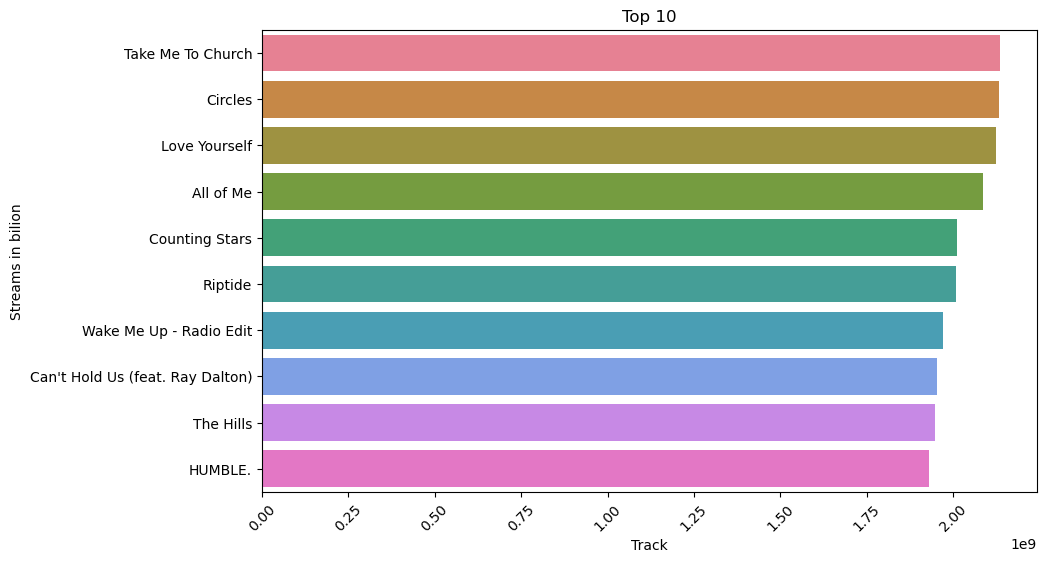

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Top_10_songs['streams'], y=Top_10_songs['track_name'], palette='husl')
plt.xlabel("Track")
plt.ylabel("Streams in bilion")
plt.title("Top 10")
plt.xticks(rotation=45)  

plt.show()

<h3><center>Artists with the highest number of song plays</center> </h3>

In [79]:
Top_10_artists = df.groupby('artist(s)_name')['streams'].sum().reset_index().sort_values(by='streams', ascending=False).head(10)
Top_10_artists

,artist(s)_name,streams
558,Taylor Swift,14053658300
43,Bad Bunny,9997799607
572,The Weeknd,8334174148
431,Olivia Rodrigo,7442148916
171,Eminem,6183805596
75,Bruno Mars,5846920599
25,Arctic Monkeys,5569806731
135,Doja Cat,4702294655
498,SZA,4557811204
7,Adele,4508746590


In [84]:
fig = px.bar(Top_10_artists, x='artist(s)_name', y='streams', title='Histogram Top 10 Artists')
fig.update_xaxes(title_text='Artist')
fig.update_yaxes(title_text='Strems')
fig.show()

<h3><center>In which decade is music the most popular</center> </h3>

In [89]:
### Due to this information we need to create 10 decades
df[["released_year","track_name"]].sort_values(by="released_year", ascending=True)

,released_year,track_name
439,1930,Agudo Mï¿½ï¿½gi
469,1942,White Christmas
460,1946,The Christmas Song (Merry Christmas To You) - ...
466,1950,Let It Snow! Let It Snow! Let It Snow!
459,1952,A Holly Jolly Christmas - Single Version
...,...,...
225,2023,Bite Me
223,2023,Snow On The Beach (feat. More Lana Del Rey)
220,2023,Las Morras
236,2023,AMERICA HAS A PROBLEM (feat. Kendrick Lamar)


In [93]:
def decade(released_year):
    if released_year >= 1930 and released_year <= 1939:
        return 1930
    elif released_year >= 1940 and released_year <= 1949:
        return 1940
    elif released_year >= 1950 and released_year <= 1959:
        return 1950
    elif released_year >= 1960 and released_year <= 1969:
        return 1960
    elif released_year >= 1970 and released_year <= 1979:
        return 1970
    elif released_year >= 1980 and released_year <= 1989:
        return 1980
    elif released_year >= 1990 and released_year <= 1999:
        return 1990
    elif released_year >= 2000 and released_year <= 2009:
        return 2000
    elif released_year >= 2010 and released_year <= 2019:
        return 2010
    elif released_year >= 2020 and released_year <= 2023:
        return 2020
    else:
        return None

In [98]:
df['decade'] = df['released_year'].apply(decade)
Decades = df.groupby('decade')['streams'].sum().reset_index().sort_values(by='streams', ascending=False).head(10)
Decades

,decade,streams
9,2020,236543737841
8,2010,78889770181
7,2000,23175971930
6,1990,13615632438
5,1980,10333155317
2,1950,3672782497
3,1960,2456990992
4,1970,2084664620
1,1940,785363360
0,1930,90598517


In [102]:
labels = Decades['decade']
values = Decades['streams']
fig = px.pie(values=values, names=labels, hole=0.4)
fig.update_traces(textinfo='percent+label')
fig.update_layout(title='In which decade is music the most popular', showlegend=False)
fig.show()

<h3><center>Title of the song worked on by the largest number of artists</center> </h3>

In [106]:
Artist_group = df.nlargest(5, 'artist_count')[['track_name', 'artist_count']]
Artist_group

,track_name,artist_count
35,Los del Espacio,8
642,Se Le Ve,8
506,We Don't Talk About Bruno,7
667,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...",7
393,Jhoome Jo Pathaan,6


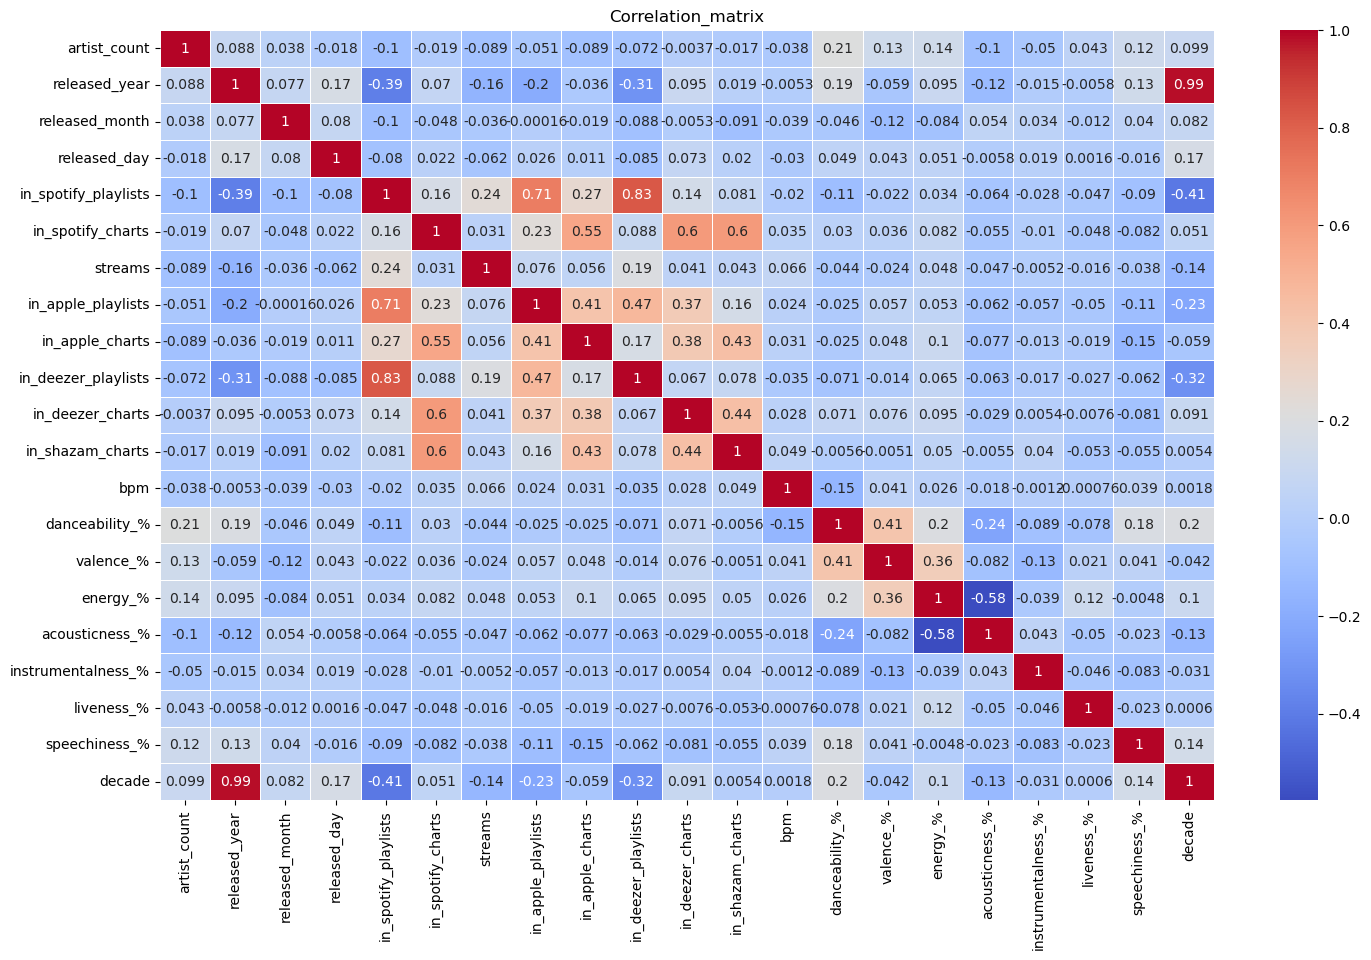

In [112]:
correlation_matrix = df.corr()
plt.figure(figsize=(17, 10))  # Opcjonalnie, ustaw rozmiar wykresu
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation_matrix')
plt.show()

<h4>Conclusions from the matrix plot</h4>
Through the correlation matrix, we can observe the obvious relationship between the presence of songs on different music platforms. This can be seen in the central part of the chart where values are closer to the red or orange colors. Of particular interest is the connection between 'valence,' 'danceability,' and 'energy.' This suggests that during dancing, the positivity of the song's musical content and the energy conveyed by the song are important to us.

<h3><center>Forecast</center> </h3>

In [129]:
###Creating a forecast for the presence of a song on the charts

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[["released_year", "released_month", "bpm", "danceability_%", "valence_%", "energy_%"]]
y = df["in_spotify_charts"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.3612565445026178


<h4>Conclusion</h4> 
The model is not able to accurately predict whether a song will be on the charts. This is due to many variables that are not even included in the given dataset.

<h2>Thank you very much for reviewing the provided report, and I recommend exploring others available on my GitHub:{""}</h2>